<a href="https://colab.research.google.com/github/RennanRnz/RennanRnz/blob/main/MOD11TAR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [ ]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [ ]:
df = pd.read_csv('housing.csv')


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)

Valores ausentes por coluna:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
# Preencher valores ausentes na coluna total_bedrooms com a mediana
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

# Verificar tipos de dados
data_types = df.dtypes
print("Tipos de dados:")
print(data_types)

# Converter colunas categóricas em variáveis dummy
df = pd.get_dummies(df, drop_first=True)

Tipos de dados:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [ ]:
# Definir as features e target
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [ ]:
import matplotlib.pyplot as plt

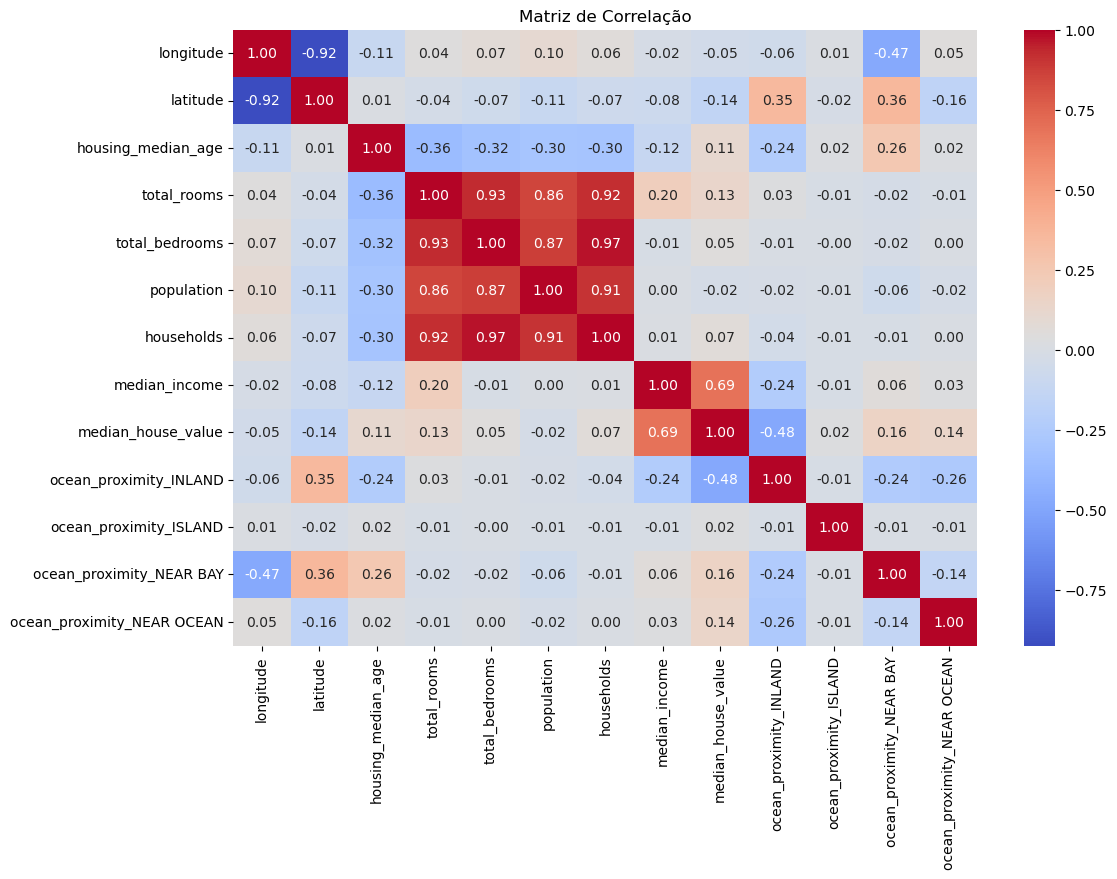

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Visualizar a matriz de correlação usando um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

### 3. Separe os dados em validação e teste

In [ ]:
# Separando os dados na variavel x e y
X = df.drop(columns = ['median_house_value']).copy()
# Garantindo todas as variaveis no formato numerico
X[['ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']] = X[['ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']].astype(int)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   ocean_proximity_INLAND      20640 non-null  int32  
 9   ocean_proximity_ISLAND      20640 non-null  int32  
 10  ocean_proximity_NEAR BAY    20640 non-null  int32  
 11  ocean_proximity_NEAR OCEAN  20640 non-null  int32  
dtypes: float64(8), int32(4)
memory usage: 1.6 MB
None


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0


In [ ]:
y =  df.loc[:,'median_house_value']
print(y.info())
y.head()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB
None


0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [ ]:
regr_1 = DecisionTreeRegressor(max_depth=8)
regr_2 = DecisionTreeRegressor(max_depth=2)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O MSE da árvore com profundidade = {0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore com profundidade = 8 é: 0,76
O MSE da árvore com profundidade = 2 é: 0,50


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A árvore com profundidade = 8 obteve um MSE de 76% superior a árvore de profundidade 2.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

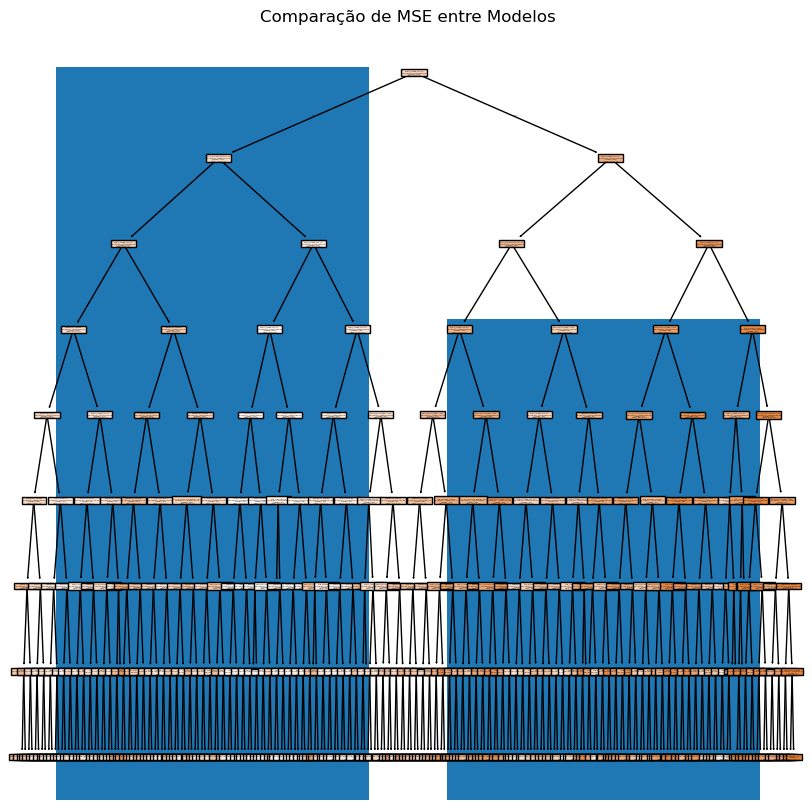

In [ ]:
models = ['Modelo 1', 'Modelo 2']
mse_values = [mse1, mse2]

# Criando o gráfico de barras
plt.bar(models, mse_values)
plt.xlabel('Modelos')
plt.ylabel('MSE')
plt.title('Comparação de MSE entre Modelos')
plt.show()

In [ ]:
importances = regr_1.feature_importances_

# Criar um DataFrame para visualizar as importâncias
importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance = importance.sort_values(by='Importance', ascending=False)

print(importance)

                       Feature  Importance
7                median_income    0.597826
8       ocean_proximity_INLAND    0.185372
0                    longitude    0.086762
1                     latitude    0.073273
2           housing_median_age    0.029550
11  ocean_proximity_NEAR OCEAN    0.010393
4               total_bedrooms    0.007180
5                   population    0.005588
3                  total_rooms    0.003660
6                   households    0.000397
9       ocean_proximity_ISLAND    0.000000
10    ocean_proximity_NEAR BAY    0.000000


A median_income aparenta ser a variável com maior percentual de importancia.

-------------------